# ***Hypothesis Testing with Insurance Data***

In [162]:
# Import Libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [163]:
# load Data:

df = pd.read_csv('C:\\Users\jnate\\OneDrive\\Documents\\Data Enrichment\\data-enrichment-wk15\\Hypothesis-Testing-\\insurance - insurance.csv')

df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [164]:
# Remove rows with null values

df.dropna(inplace =True)

In [165]:
# Check for missing values:

df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Q1. Do smokers have higher insurance charges than non-smokers?

***1. State your Null Hypothesis and Alternative Hypothesis:****

***$H_0$: Smokers pay the same in insurance as non smokers.***

***$H_A$: Smokers pay more in insurance than non smokers.*** 

***2. Select the correct test according to the data type and number of samples.***

Type of comparison: 2 samples

Data type: Numeric

Hypothesis Test: ***2 Sample T-Test***

In [166]:
# Required columns:

requiredcols = ['charges']


# Separation of smokers an non smokers:

smokersdf = df.loc[df['smoker']=='yes', requiredcols].copy()
nonsmokersdf = df.loc[df['smoker']=='no', requiredcols].copy()

smokersdf.head()

,charges
0,16884.9240
11,27808.7251
14,39611.7577
19,36837.4670
23,37701.8768


In [167]:
nonsmokersdf.head()

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160


In [168]:
nonsmokersdf.value_counts()

charges    
1639.56310     2
1121.87390     1
10085.84600    1
9866.30485     1
9869.81020     1
              ..
5012.47100     1
5028.14660     1
5031.26955     1
5080.09600     1
36910.60803    1
Length: 1063, dtype: int64

***3. Test the assumptions of your selected test.***
- No significant outliers
- Normality
- Equal Variance

### ***Outliers Test***

In [169]:
# Check for and remove outliers as required:

# Savings jsut the numeric column as final group variable:

smokers = smokersdf['charges'].copy()
nonsmokers = nonsmokersdf['charges'].copy()

# Import additional libraries:
import numpy as np
from scipy.stats import stats

In [170]:
# Check for outliers using Z-score:

smokers_out = np.abs(stats.zscore(smokers))>3
smokers_out.value_counts()

False    274
Name: charges, dtype: int64

In [171]:
# Check for outliers using Z-score:

nonsmokers_out = np.abs(stats.zscore(nonsmokers))>3
nonsmokers_out.value_counts()

False    1040
True       24
Name: charges, dtype: int64

In [172]:
# Remove outliers:

final_smokers = smokers[-smokers_out]
final_nonsmokers = nonsmokers[-nonsmokers_out]

### ***Normality Test***

In [173]:
# Normality test for smokers group:

smokeNT = stats.normaltest(final_smokers)
smokeNT

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [174]:
# Check number of smaples for smokers group:

len(final_smokers)

274

In [175]:
# Normality test for nonsmokers group:

nonsmokeNT = stats.normaltest(final_nonsmokers)
nonsmokeNT

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

In [176]:
# Check number of smaples for smokers group:

len(final_nonsmokers)

1040

### Interpretation:

$smokers_p$: 5.565x10^{-14}

$smokers_n$: 274

$nonsmokers_p$: 2.70x10^{-36}

$nonsmokers_n$: 1040: 

p-values for both group are far below 0.05, meaning that our data is NOT normally distributed. This is not an issue however, because we have sample sizes of 274 and 1040, both of which are well above the 15 sample minimum requirement for an independent t test. We can proceed without normalized data.

***4. Execute the selected test, or the alternative test (if you do not meet the assumptions)***

### ***Equal Variance Test***

In [177]:
import numpy as np
from scipy import stats

# Levene's test for equal variance:

smokeLT = stats.levene(final_smokers, final_nonsmokers)
smokeLT


smokeLT.pvalue<0.05

True

In [178]:
# If-else to interpret the p-value:

if smokeLT.pvalue < 0.05:
    print('The groups ***DO NOT*** have equal variance')
    
else:
    print('The groups ***DO*** have equal variance')

The groups ***DO NOT*** have equal variance


### Interpretation:
We will need to use a Welch's T test because the assumption of equal variance was inaccurate.

In [179]:
# Welch's T-Test because of unequal variance:

WTT = stats.ttest_ind(final_smokers, final_nonsmokers, equal_var = False)
WTT

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)

In [180]:
# Interpretation of final pvalue:

# Check for high significance : 

print(WTT.pvalue<0.0001)

True


***5. Interpret your p-value and reject or fail to reject your null hypothesis*** 

## Final Conclusion:

p is less than alpha so we will reject the null hypothesis , that states that "Smokers pay the same in insurance as non smokers." There is a significant difference between the groups:Smokers pay more in insurance than non smokers.

***6. Show a supporting visualization that helps display the result***

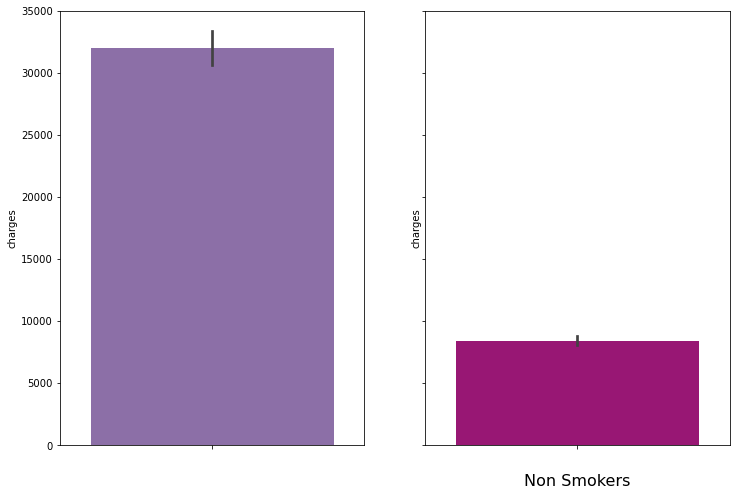

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1, ncols = 2, sharey = True, figsize = (12,8))

a = sns.barplot(data = smokersdf, y = 'charges', ax= axes[0], color = '#3f007d', alpha =.6);
b = sns.barplot(data = nonsmokersdf, y = 'charges', ax = axes[1], color = '#ae017e');
plt.xlabel('\nNon Smokers', fontsize = 16);

## Interpretation:

We can clearly see that smokers pay far more in insurance than non smokers. 

# Q2. Are men more likely to smoke than women?

***1. State your Null Hypothesis and Alternative Hypothesis:***

$𝐻_0$ : Men are not more likely to smoke than women - they are equally likely.

$𝐻_𝐴$ : Men are more likely to smoke than women.

***2. Select the correct test according to the data type and number of samples.***

Type of comparison: 2 samples

Data type: Categorical

Hypothesis Test: Chi-squared (x^2) Test

***3. Test the assumptions of your selected test.***

- There are two categorical variables (ordinal or nominal)
- The outcomes are independent

In [182]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [183]:
# Calculate the contingency table with pd.cross-tab:

ct = pd.crosstab(df['sex'], df['smoker'])
ct

smoker,no,yes
sex,,
female,547,115
male,517,159


## Interpretation:

The two nominal categories are male and female, however the outcomes do not appear to be independent.

***4. Execute the selected test, or the alternative test (if you do not meet the assumptions)***

In [184]:
# Run the Test and Save the Output:

tr = stats.chi2_contingency(ct)
chi2, p, deg_free, expected_vals = tr 

# Print p value:

print(p)
p<.05

0.006548143503580696


True

***5. Interpret your p-value and reject or fail to reject your null hypothesis***

## Final Conclusion:

At 6.55x10^{10-3} which is smaller than 0.03 our  p value is significant. We can reject the null hypothesis with confidence: men ***ARE*** more likley to smoke than women are. 

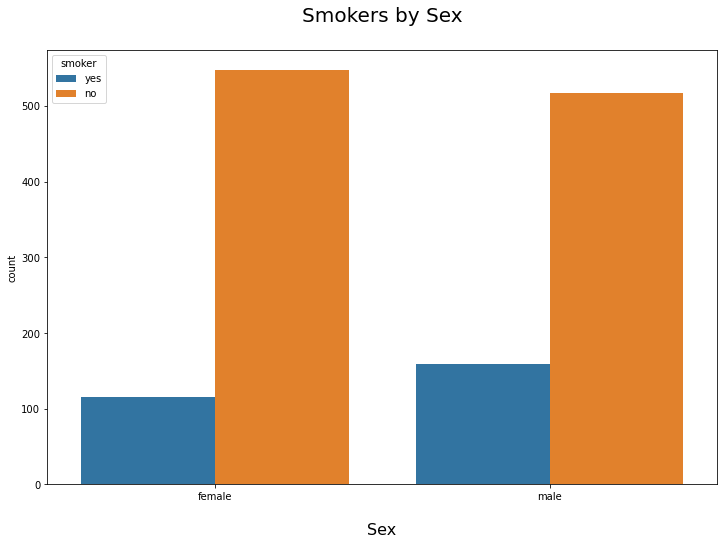

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1, ncols = 1, sharey = True, figsize = (12,8))

ax = sns.countplot(data=df, x='sex',hue='smoker',)
ax.set_title("Smokers by Sex\n", fontsize =20);
plt.xlabel('\nSex', fontsize = 16);

## Interpretation:

It is evident that men are more likely to be smokers.

# Q3. Do different regions have different charges, on average?

***1. State your Null Hypothesis and Alternative Hypothesis:***

$𝐻_0$  : Charges do not change significantly across differnet regions.

$𝐻_𝐴$  : Charges vary significantly from region to region.

***2. Select the correct test according to the data type and number of samples.***

Type of comparison: 2 samples

Data type: Numeric

Hypothesis Test: Chi-squared (x^2) Test

***3. Test the assumptions of your selected test.***
- No significant outliers
- Normality
- Equal Variance

In [186]:
# Check for total number of regions:

df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [187]:
# Create dictionary for the various regions:

regions = {}

# Loop through column to get the unique designations:

for i in df['region'].unique():
    # Get series for group and rename:
    data = df.loc[df['region']==i, 'charges'].copy()
    
    # Append dictionary:
    regions[i] = data
regions.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [205]:
regions

{'southwest': 0       16884.92400
 12       1826.84300
 15       1837.23700
 18      10602.38500
 19      36837.46700
            ...     
 1316     1731.67700
 1329    10325.20600
 1331    10795.93733
 1332    11411.68500
 1336     2007.94500
 Name: charges, Length: 325, dtype: float64,
 'southeast': 1        1725.5523
 2        4449.4620
 5        3756.6216
 6        8240.5896
 11      27808.7251
            ...    
 1322    12981.3457
 1323    43896.3763
 1327     9377.9047
 1330    12629.1656
 1335     1629.8335
 Name: charges, Length: 364, dtype: float64,
 'northwest': 3       21984.47061
 4        3866.85520
 7        7281.50560
 9       28923.13692
 24       6203.90175
            ...     
 1319     7201.70085
 1320     5425.02335
 1324     4239.89265
 1333    10600.54830
 1337    29141.36030
 Name: charges, Length: 325, dtype: float64,
 'northeast': 8        6406.41070
 10       2721.32080
 16      10797.33620
 17       2395.17155
 20      13228.84695
            ...     
 1321

### Significant Outliers Test

In [207]:
# Check for significant outliers:

for region_name, charges_df in regions.items():
    # Identify outliers:
    outliers = np.abs(stats.zscore(charges_df))>3
    
    # Outliers per region:
    print(f"There were {outliers.sum()} outliers in the {region_name} group.")
    
    # Remove the outliers from dat and overwrite teh region dictionary:
    charges_df = charges_df[~outliers]
    
    regions[region_name] = charges_df

There were 8 outliers in the southwest group.
There were 2 outliers in the southeast group.
There were 7 outliers in the northwest group.
There were 4 outliers in the northeast group.


### Normality Test

In [188]:
# Normality Test:

# Normal test for each region to confirm that there are more than 20 samples in each group.

test_results = {}

for i, data in regions.items():
    stat, p = stats.normaltest(data)
    # save p value, test statistic, and the size of the group:
    
    test_results[i] = {'n': len(data),
                      'p' : p,
                      'test sta' : stat,}
# Converst reuslts to DataFrame:
test_results_df = pd.DataFrame(test_results).T
test_results_df

,n,p,test sta
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [208]:
# Checking sig with pandas:

test_results_df['significance'] = test_results_df['p'] < .05 
test_results_df

,n,p,test sta,sig,significance
southwest,325.0,6.125298e-23,102.294059,True,True
southeast,364.0,4.953297e-15,65.877446,True,True
northwest,325.0,5.184209e-24,107.232850,True,True
northeast,324.0,1.455431e-19,86.747629,True,True


### Test for Equal Variance 

In [196]:
# Test for Equal Variance:

regionsLT = stats.levene(*regions.values())
regionsLT

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

In [197]:
# If-else to interpret the p-value:

if regionsLT.pvalue < 0.05:
    print('The groups ***DO NOT*** have equal variance')
    
else:
    print('The groups ***DO*** have equal variance')

The groups ***DO NOT*** have equal variance


***4. Execute the selected test, or the alternative test (if you do not meet the assumptions)***

In [216]:
# Post HOC Test:

from statsmodels.stats.multicomp import pairwise_tukeyhsd

regionsPWT = pairwise_tukeyhsd(endog = df['charges'], groups = df['region'], alpha = 0.5)

print(regionsPWT)

       Multiple Comparison of Means - Tukey HSD, FWER=0.50        
  group1    group2   meandiff  p-adj    lower      upper    reject
------------------------------------------------------------------
northeast northwest  -988.8091 0.7245 -2316.1729   338.5546  False
northeast southeast  1329.0269 0.4745    37.6507  2620.4032   True
northeast southwest -1059.4471 0.6792 -2386.8108   267.9166  False
northwest southeast  2317.8361 0.0583  1027.5113  3608.1608   True
northwest southwest    -70.638 0.9999 -1396.9787  1255.7027  False
southeast southwest -2388.4741 0.0477 -3678.7988 -1098.1493   True
------------------------------------------------------------------


***5. Interpret your p-value and reject or fail to reject your null hypothesis*** 



## Final Conclusion:¶

Our p values are above the alpha value of 0.05, meaning that we fail to reject the null hypothesis - insurance charges do not necessarily vary due to region. 

***6. Show a supporting visualization that helps display the result***

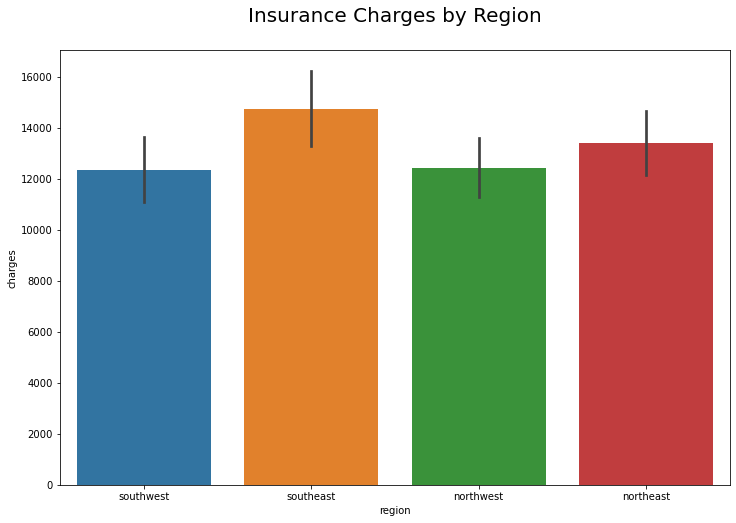

In [203]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, sharey = True, figsize = (12,8))

ax = sns.barplot(data = df, x ='region', y = 'charges');
ax.set_title("Insurance Charges by Region\n", fontsize =20);
